In [2]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df.info()
df['job_skills']=df['job_skills'].apply(lambda salary: ast.literal_eval(salary) if pd.notna(salary) else salary)

c:\Users\mathe\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [31]:
df_DA_ind=df[df['job_country']=='India'].copy()

In [43]:
df_Da_exploded=df_DA_ind.explode('job_skills')
skill_count=df_Da_exploded.groupby(['job_skills','job_title_short']).size()
df_skill_count=skill_count.reset_index(name='skill_count')
df_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
389,esquisse,Data Scientist,1
887,node.js,Senior Data Analyst,1
753,matlab,Cloud Engineer,1
411,fastapi,Cloud Engineer,1


In [45]:
job_count=df_DA_ind['job_title_short'].value_counts().reset_index(name='job_total')

In [48]:
df_skill_percent=pd.merge(df_skill_count,job_count,how='left',on='job_title_short')
df_skill_percent

,job_skills,job_title_short,skill_count,job_total
0,sql,Data Engineer,12993,19062
1,python,Data Engineer,11568,19062
2,python,Data Scientist,9248,13279
3,spark,Data Engineer,7157,19062
4,aws,Data Engineer,6993,19062
...,...,...,...,...
1684,esquisse,Data Scientist,1,13279
1685,node.js,Senior Data Analyst,1,1083
1686,matlab,Cloud Engineer,1,351
1687,fastapi,Cloud Engineer,1,351


In [50]:
df_skill_percent['skill_percent']=(df_skill_percent['skill_count']/df_skill_percent['job_total'])*100
df_skill_percent

,job_skills,job_title_short,skill_count,job_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


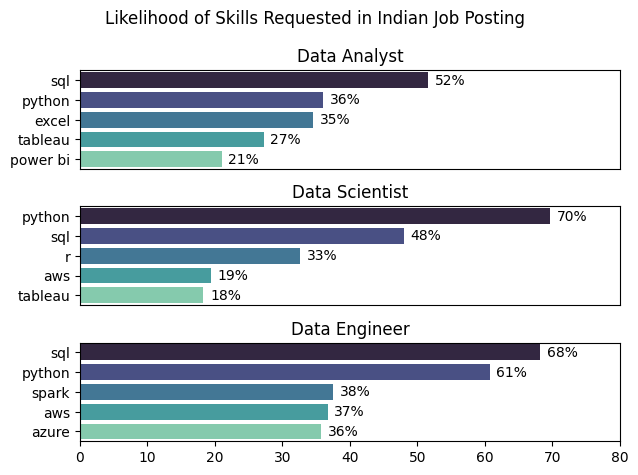

In [88]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']
fig,ax=plt.subplots(3,1)
for i,job_title in enumerate(job_titles):
    df_skill_plot=df_skill_percent[df_skill_percent['job_title_short']==job_title].head(5)
    #df_skill_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
    sns.barplot(df_skill_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='job_skills',palette='mako')
    ax[i].set_ylabel('')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('') 
    fig.tight_layout()
    ax[i].set_xlim(0,80)
    if i != len(job_titles)-1:
     ax[i].set_xticks([])
    fig.suptitle('Likelihood of Skills Requested in Indian Job Posting')
    for n,v in enumerate(df_skill_plot['skill_percent']):
        ax[i].text(v+1,n,f'{v:.0f}%',va='center')